In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt

In [3]:
X = np.linspace(-5, 10, 500)
X_2 = X**2

y = 3*X**2 + np.random.normal(0,4, size = len(X))

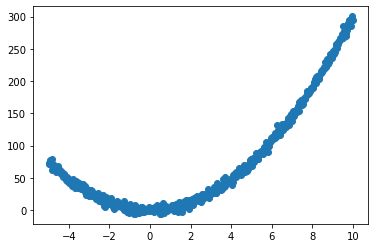

In [7]:
plt.scatter(X, y)

In [10]:
model_1 = LR().fit(X.reshape(-1,1), y)
model_2 = LR().fit(X_2.reshape(-1,1),y)

In [12]:
model_1_Y = model_1.predict(X.reshape(-1,1))
model_2_Y = model_2.predict(X_2.reshape(-1,1))

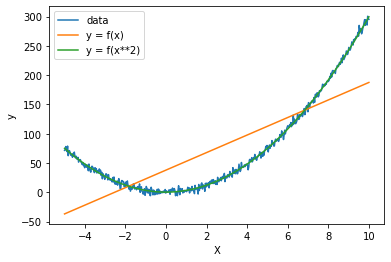

In [16]:
plt.xlabel("X")
plt.ylabel("y")

plt.plot(X, y, label = 'data')
plt.plot(X,model_1_Y, label = 'y = f(x)')
plt.plot(X,model_2_Y, label = 'y = f(x**2)')

plt.legend(loc = 'best')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression as LR
X = np.random.random(size = 10).tolist() + (np.random.random(size = 10) + 1).tolist() + (np.random.random(size =10) + 2).tolist()
Y = [0]*9 + [1]*1 + [0]*2 + [1]*8 + [0]*9 + [1]*1

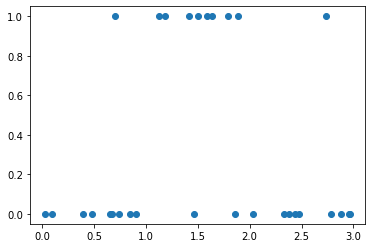

In [19]:
plt.scatter(X,Y)

In [20]:
X = np.array(X)
Y = np.array(Y)

cond = np.logical_and(X>1, X<=2)
X_tilda = X.copy()####
X_tilda[cond] = 1
X_tilda[~cond] = 0

In [26]:
LR

sklearn.linear_model._logistic.LogisticRegression

In [21]:
model_1 = LR().fit(X.reshape(-1,1),Y)
model_2 = LR().fit(X_tilda.reshape(-1,1),Y)

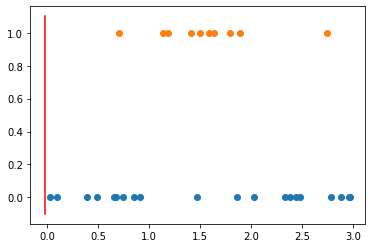

In [32]:
decision_boundary = (-model_1.coef_[0] / model_1.intercept_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y ==0], Y[Y == 0])
plt.scatter(X[Y ==1], Y[Y == 1])

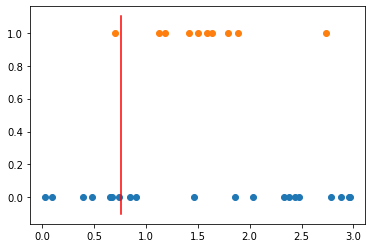

In [36]:
decision_boundary = (- model_2.intercept_[0]/ model_2.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y ==0], Y[Y == 0])
plt.scatter(X[Y ==1], Y[Y == 1])

In [ ]:
# grid search - 하이퍼파라미터는 dict type 데이터를 넣는다.
# 하이퍼파라미터의 keys 값은 제대로 정의된 keys값으로 사용해줘야한다.
# 너무 heavy해서 잘사용하지않음
# ParameteGrid를 통해서 실무에서 자주 사용함.

In [37]:
from sklearn.model_selection import ParameterGrid

grid = {"n_neighbors" : [3,5,7],
        "metric" : ["Manhattan", "Euclidean"]}

list(ParameterGrid(grid)) # 실사용시 구지 list로 변환하지 않음. ######

[{'metric': 'Manhattan', 'n_neighbors': 3},
 {'metric': 'Manhattan', 'n_neighbors': 5},
 {'metric': 'Manhattan', 'n_neighbors': 7},
 {'metric': 'Euclidean', 'n_neighbors': 3},
 {'metric': 'Euclidean', 'n_neighbors': 5},
 {'metric': 'Euclidean', 'n_neighbors': 7}]

In [39]:
def f(a,b):
    return a+b

input_f = {"a":1, "b":2}

f(**input_f) #######

3

In [41]:
L = [10,20,30,10,20]
min_value = 999999

for value in L :
    if min_value > value :
        min_value = value
        
print(min_value)

10


model traing section

In [42]:
from sklearn.datasets import load_iris

X = load_iris()['data'] # feature
Y = load_iris()['target'] # label

In [51]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y)

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [46]:
param_grid = dict()

param_grid_for_Knn = ParameterGrid({"n_neighbors" : [3,5,7],
                                    "metric" : ['euclidean', 'manhattan']})
param_grid_for_svm = ParameterGrid({'C': [0.1, 1, 10],
                                    'kernel': ['rbf', 'linear']})
param_grid[KNN] = param_grid_for_Knn
param_grid[SVC] = param_grid_for_svm

In [52]:
best_score = -1 # f1_score는 절대 -1이 될 수 없기에 -1로 초기화
from sklearn.metrics import f1_score

for model_func in [KNN,SVC]:
    for param in param_grid[model_func]:
        model = model_func(**param).fit(Train_X, Train_Y)
        pred_Y = model.predict(Test_X)
        score = f1_score(Test_Y, pred_Y, average = 'micro')
        
        if score > best_score :
            best_model_func = model_func
            best_score = score
            best_param = param
            
            # 

In [53]:
print(best_model_func)
print(best_param)
print(best_score)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
{'metric': 'euclidean', 'n_neighbors': 3}
0.9736842105263158


In [56]:
final_model = best_model_func(**best_param).fit(X,Y)

In [1]:
import os

os.chdir(r"C:\Users\yease\파이썬을 활용한 데이터 전처리 Level Up 올인원 패키지 Online\part-3.-지도학습-주요모델-및-개념\Part 3. 지도학습 주요모델 및 개념\데이터")

In [58]:
df = pd.read_csv("Combined_Cycle_Power_Plant.csv")

In [59]:
# 특징 개수가 매우 적은 경우
# 모두 연속형
# feature 간 scale 차이가 꽤 나는 것으로 보임.

,T,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [60]:
X = df.drop('EP', axis = 1)
Y = df['EP']

In [61]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR

SVR_model = SVR()
MLP_model = MLP(random_state= 100)
LR_model = LR()
DTR_model = DTR(random_state = 100)
RFR_model = RFR(random_state = 100)
KNR_model = KNR()

model_list = [SVR_model,MLP_model,LR_model,DTR_model,RFR_model,KNR_model]
model_name_list = ['SVR','MLP', 'LR',"DTR","RFR","KNR"]

In [62]:
from sklearn.model_selection import cross_val_score
for (model, model_name) in zip(model_list, model_name_list):
    score = -cross_val_score(model, X, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean()
    print(model_name, score)

SVR 11.15624063928403
MLP 3.942187462994771
LR 3.628251380729045
DTR 3.0464405292720267
RFR 2.365834244467129
KNR 2.9176435395285303


In [63]:
# 샘플적고 특징이 많음
df = pd.read_csv("baseball.csv")
df.shape

(337, 17)

In [65]:
X = df.drop('Salary', axis = 1)
Y = df['Salary']

In [67]:
SVR_model = SVR()
MLP_model = MLP(random_state= 100)
LR_model = LR()
DTR_model = DTR(random_state = 100)
RFR_model = RFR(random_state = 100)
KNR_model = KNR()

model_list = [SVR_model,MLP_model,LR_model,DTR_model,RFR_model,KNR_model]
model_name_list = ['SVR','MLP', 'LR',"DTR","RFR","KNR"]

for (model,model_name) in zip(model_list, model_name_list):
    score = -cross_val_score(model,X,Y,cv = 5, scoring = 'neg_mean_absolute_error').mean()
    print(model_name,score)


SVR 940.1650397834104


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLP 710.1436141313577
LR 539.5671145383988
DTR 573.3383230904303
RFR 467.4962985074626
KNR 651.0923792800702


In [2]:
import os
import pandas as pd
df = pd.read_csv("Telco_churn_prediction.csv")

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
def find_str_element(val):
    try:
        float(val)
        return False
    except:
        return True
    
print(df['TotalCharges'][df['TotalCharges'].apply(find_str_element)].values)

[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']


In [13]:
def getting_unique_val(col):
    return len(col.unique())

df.apply(getting_unique_val, axis = 0)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df = pd.read_csv("baseball.csv")

In [19]:
X = df.drop('Salary', axis = 1)
Y = df['Salary']

In [20]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neural_network import MLPRegressor as MLR
from sklearn.tree import DecisionTreeRegressor as DTR

LR_model = LR()
KNR_model = KNR()
RFR_model = RFR(random_state= 100)
MLR_model = MLR(random_state= 100)
DTR_model = DTR(random_state= 100)

model_name_list = ['LR','KNR','RFR','MLR','DTR']
model_list = [LR_model, KNR_model, RFR_model, MLR_model, DTR_model]

In [23]:
Y.describe()

count     337.000000
mean     1248.528190
std      1240.013309
min       109.000000
25%       230.000000
50%       740.000000
75%      2150.000000
max      6100.000000
Name: Salary, dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score

for (model,model_name) in zip(model_list,model_name_list):
    score = -cross_val_score(model,X,Y,cv=5, scoring= 'neg_mean_absolute_error').mean()
    print(model_name, score)


LR 539.5671145383988
KNR 651.0923792800702
RFR 467.4962985074626


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLR 710.1436141313577
DTR 573.3383230904303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
df = pd.read_csv("Sonar_mines_Rocks.csv")

In [27]:
X = df.drop('Y', axis =1)
Y = df['Y']

In [28]:
from sklearn.model_selection import train_test_split

Train_X,Test_X,Train_Y,Test_Y = train_test_split(X,Y)

In [29]:
Train_X.shape # 단순모델이 필요 ... => Lasso or Ridge

(156, 60)

In [31]:
Train_Y.value_counts()

M    83
R    73
Name: Y, dtype: int64

In [32]:
Train_Y.replace({'M': -1, 'R':1}, inplace = True)
Test_Y.replace({'M': -1, 'R':1}, inplace = True)

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

In [34]:
from sklearn.linear_model import LogisticRegression as LR

In [36]:
def LR_model_test(C):
    model = LR(C = C, max_iter= 100000, random_state = 10).fit(Train_X,Train_Y)
    pred_Y = model.predict(Test_X)
    return f1_score(Test_Y,pred_Y)

In [37]:
print("C = 0.1 : {}".format(LR_model_test(C=0.1)))
print("C = 1 : {}".format(LR_model_test(C=1)))
print("C = 5: {}".format(LR_model_test(C=5)))

C = 0.1 : 0.6666666666666666
C = 1 : 0.7391304347826088
C = 5: 0.723404255319149


In [38]:
#위 결과를보면 0.1 ~ 5 사이를 서치하면 될듯
print("C = 0.5 : {}".format(LR_model_test(C=0.5)))
print("C = 2 : {}".format(LR_model_test(C=2)))

C = 0.5 : 0.7659574468085107
C = 2 : 0.7555555555555556


In [43]:
# 위 결과에 따라 0.1 ~ 1 사이를 튜닝하는게
import numpy as np
LR_parameter_grid = ParameterGrid({'C' : np.linspace(0.1, 1, 50),
                                  'max_iter' : [100000],
                                   'random_state' : [10]})


In [47]:
best_score = -1
for parameter in LR_parameter_grid :
    model = LR(**parameter).fit(Train_X,Train_Y)
    pred_Y = model.predict(Test_X)
    score = f1_score(Test_Y, pred_Y)
    
    if score > best_score :
        best_score = score
        best_parameter = parameter
        
        
print(best_score,best_parameter)


0.7659574468085107 {'C': 0.3571428571428572, 'max_iter': 100000, 'random_state': 10}


In [49]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [50]:
def DTC_model_test(max_depth, min_samples_leaf):
    model = DTC(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(Train_X, Train_Y)
    pred_Y = model.predict(Test_X)
    return f1_score(Test_Y, pred_Y)

In [51]:
for max_depth in [3,6,9]:
    for min_samples_leaf in [1,2,3] :
        score = DTC_model_test(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        print("{} - {} : {}".format(max_depth, min_samples_leaf, score))

3 - 1 : 0.7999999999999999
3 - 2 : 0.7999999999999999
3 - 3 : 0.7999999999999999
6 - 1 : 0.851063829787234
6 - 2 : 0.7111111111111111
6 - 3 : 0.7555555555555556
9 - 1 : 0.7826086956521738
9 - 2 : 0.7999999999999999
9 - 3 : 0.7659574468085107


In [52]:
DTC_parameter_grid = ParameterGrid({'max_depth' : np.arange(6,15),
                                    'min_samples_leaf' : np.arange(1,5)})

best_score = -1
for parameter in DTC_parameter_grid:
    score= DTC_model_test(**parameter)
    
    if score > best_score :
        best_score = score
        best_param = parameter
        
print(best_score, best_param)

0.8260869565217391 {'max_depth': 10, 'min_samples_leaf': 1}


In [56]:
from sklearn.neural_network import MLPClassifier as MLPC

def MLPC_model_test(hidden_layer_sizes):
    model = MLPC(hidden_layer_sizes=hidden_layer_sizes, random_state= 12).fit(Train_X,Train_Y)
    pred_Y = model.predict(Test_X)
    return f1_score(Test_Y,pred_Y)

In [57]:
for hidden_layer_sizes in [(5,), (10,), (3,3), (5,5), (10,10)]:
    score = MLPC_model_test(hidden_layer_sizes=hidden_layer_sizes)
    print(hidden_layer_sizes, score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(5,) 0.631578947368421
(10,) 0.6956521739130435
(3, 3) 0.36363636363636365
(5, 5) 0.0
(10, 10) 0.8085106382978724


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
MLPC_parameter_grid = ParameterGrid({'random_state' : [41, 102, 15],
                                     'hidden_layer_sizes' : [(5,5), (10,10), (5,5,5), (10,10,10)],
                                     'max_iter': [200, 2000, 20000]})

In [64]:
best_score = -1
for parameter in MLPC_parameter_grid:
    model = MLPC(**parameter).fit(Train_X,Train_Y)
    pred_Y = model.predict(Test_X)
    score = f1_score(Test_Y,pred_Y)
    
    
    if score > best_score:
        best_score = score
        best_param = parameter
        
print(best_param, score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'hidden_layer_sizes': (5, 5), 'max_iter': 2000, 'random_state': 41} 0.7999999999999999


In [ ]:
MLPC(max)